# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
f = "merged_HG00129.txt"

In [3]:
df = pd.read_csv(f, header=None)
df = df.astype(str)

df

,0
0,chr10:102885491-102885839/ 120 4 124 chr10:102...
1,chr10:103337767-103338096/ 124 22 146 chr10:10...
2,chr10:10451447-10451779/ 20 80 100 chr10:10451...
3,chr10:105917786-105918126/ 82 32 114 chr10:105...
4,chr10:10666573-10666897/ 38 70 108 chr10:10666...
...,...
1832,chrX:88488057-88488366/ 16 40 56 chrX:88488072...
1833,chrX:94309970-94310312/ 66 4 70 chrX:94309987 0/0
1834,chrX:96751638-96751966/ 40 12 52 chrX:96751651...
1835,chrX:96939661-96939977/ 46 0 46 chrX:96939674 0/0


In [4]:
# split column into multiple columns by delimiter 
df = df[0].str.split(' ', expand=True)
df

,0,1,2,3,4,5
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0/0


In [5]:
# locus = dir_name
df.columns = ["locus1", "f2_count_REF", "f2_count_ALT", "f2_count", "locus2", "genotype"]

In [6]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df = df.astype(dict_type_convert)
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0/0


In [7]:
df["locus1"] = df["locus1"].str.split("/").str[0]
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977,46,0,46,chrX:96939674,0/0


In [8]:
df.groupby(by="genotype")["f2_count_REF"].mean()

genotype
./.    103.333333
0/0    121.331887
0/1     67.265823
1/1     33.698630
Name: f2_count_REF, dtype: float64

In [9]:
df["genotype"] = df["genotype"].map({"0/0":0,
                             "0/1":1,
                             "1/1":2,
                             "./.":3,
                             np.nan:4},
                             na_action=None)
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839,120,4,124,chr10:102885500,0
1,chr10:103337767-103338096,124,22,146,chr10:103337782,0
2,chr10:10451447-10451779,20,80,100,chr10:10451456,2
3,chr10:105917786-105918126,82,32,114,chr10:105917801,1
4,chr10:10666573-10666897,38,70,108,chr10:10666580,2
...,...,...,...,...,...,...
1832,chrX:88488057-88488366,16,40,56,chrX:88488072,1
1833,chrX:94309970-94310312,66,4,70,chrX:94309987,0
1834,chrX:96751638-96751966,40,12,52,chrX:96751651,0
1835,chrX:96939661-96939977,46,0,46,chrX:96939674,0


In [10]:
df.info()
#df = df["genotype"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   locus1        1837 non-null   object
 1   f2_count_REF  1837 non-null   int32 
 2   f2_count_ALT  1837 non-null   int32 
 3   f2_count      1837 non-null   int32 
 4   locus2        1837 non-null   object
 5   genotype      1837 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 64.7+ KB


In [11]:
f2 = "HG129_overlap_bkpt.txt"
df_breakpoints = pd.read_csv(f2, sep=",", header=None)

df_breakpoints.columns = ["locus1", "count_REF_bkptr_l", "count_REF_bkptr_r", "count_ALT_bkptr"]
df_breakpoints


,locus1,count_REF_bkptr_l,count_REF_bkptr_r,count_ALT_bkptr
0,chr10:102885491-102885839,0,0,0
1,chr10:103337767-103338096,0,0,0
2,chr10:10451447-10451779,0,0,0
3,chr10:105917786-105918126,0,0,0
4,chr10:10666573-10666897,0,0,0
...,...,...,...,...
1832,chrX:88488057-88488366,0,1,16
1833,chrX:94309970-94310312,7,14,1
1834,chrX:96751638-96751966,5,5,1
1835,chrX:96939661-96939977,0,14,0


In [17]:
df = df.merge(df_breakpoints, on = 'locus1', how = 'left')
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype,count_REF_bkptr_l_x,count_REF_bkptr_r_x,count_ALT_bkptr_x,count_REF_bkptr_l_y,count_REF_bkptr_r_y,count_ALT_bkptr_y
0,chr10:102885491-102885839,120,4,124,chr10:102885500,0,0,0,0,0,0,0
1,chr10:103337767-103338096,124,22,146,chr10:103337782,0,0,0,0,0,0,0
2,chr10:10451447-10451779,20,80,100,chr10:10451456,2,0,0,0,0,0,0
3,chr10:105917786-105918126,82,32,114,chr10:105917801,1,0,0,0,0,0,0
4,chr10:10666573-10666897,38,70,108,chr10:10666580,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX:88488057-88488366,16,40,56,chrX:88488072,1,0,1,16,0,1,16
1833,chrX:94309970-94310312,66,4,70,chrX:94309987,0,7,14,1,7,14,1
1834,chrX:96751638-96751966,40,12,52,chrX:96751651,0,5,5,1,5,5,1
1835,chrX:96939661-96939977,46,0,46,chrX:96939674,0,0,14,0,0,14,0


In [18]:
y = df["genotype"].to_numpy()
X = df[["f2_count_REF", "f2_count_ALT", "f2_count", "count_REF_bkptr_l_x", "count_REF_bkptr_r_x", "count_ALT_bkptr_x"]].to_numpy()
#X = df.iloc[:, 1:4].to_numpy()
X

array([[120,   4, 124,   0,   0,   0],
       [124,  22, 146,   0,   0,   0],
       [ 20,  80, 100,   0,   0,   0],
       ...,
       [ 40,  12,  52,   5,   5,   1],
       [ 46,   0,  46,   0,  14,   0],
       [ 80,   8,  88,  28,  13,   0]], dtype=int64)

### A function for plotting the importance of features

In [19]:
features_names = ["# of reads mapped in proper pair on the REF", "# of reads mapped in proper pair on the ALT" ,"# of reads mapped in proper pair", "REF: # of reads that spans left breakpoint (500bp position)",  "REF: # of reads that spans right breakpoint", "ALT: # of reads that spans 500bp position"]
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[134,  12, 146,  24,  21,   0],
       [ 36,  84, 120,   5,   0,  30],
       [ 34,  66, 100,   3,   1,  25],
       ...,
       [110,  22, 132,  15,  20,   3],
       [138,  16, 154,  30,  23,   0],
       [146,  10, 156,  22,  41,   2]], dtype=int64)

In [21]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [22]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[179   1   0]
 [  1  84  17]
 [  0  10  76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       180
           1       0.88      0.82      0.85       102
           2       0.82      0.88      0.85        86

    accuracy                           0.92       368
   macro avg       0.90      0.90      0.90       368
weighted avg       0.92      0.92      0.92       368

0.9211956521739131


[[ 3.15825841e+00 -4.93889368e+00 -1.78148354e+00  2.03113681e+00
   2.00530208e+00 -3.52792182e+00]
 [-8.54919498e-01  1.04860159e+00  1.96438451e-01 -5.99951294e-01
  -2.76276184e-01  1.30201202e-01]
 [-2.67442651e+00  3.06456538e+00  3.88607367e-01 -1.33508944e+00
  -1.51643895e+00  3.40040492e+00]
 [ 3.71087599e-01  8.25726720e-01  1.19643772e+00 -9.60960757e-02
  -2.12586942e-01 -2.68430374e-03]]


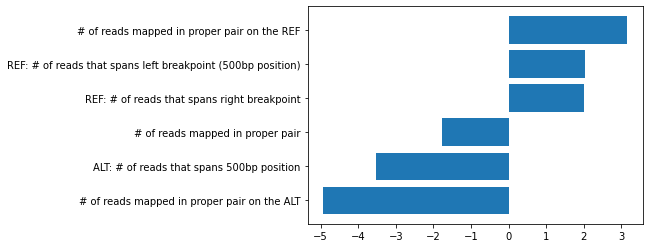

In [24]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [25]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9210327134266676


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [27]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[192   0   0   0]
 [  6  80   8   0]
 [  0   9  72   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       192
           1       0.90      0.85      0.87        94
           2       0.90      0.89      0.89        81
           3       0.00      0.00      0.00         1

    accuracy                           0.93       368
   macro avg       0.69      0.68      0.69       368
weighted avg       0.93      0.93      0.93       368

0.9347826086956522


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.9435002670009982


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [30]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [32]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [33]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.9142276705904205


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[[ 2.05717351 -3.2356916  -1.17851809  1.62679971  1.25161162 -3.55610413]
 [ 1.84934013 -2.52789957 -0.67855944  1.26055464  1.19979866 -0.82094936]
 [ 0.28257934 -0.59769247 -0.31511313  0.09945814  0.06549723 -0.31910456]
 [ 0.82674852 -1.05996377 -0.23321525  1.36955601  1.58790009 -3.03079625]
 [ 0.01528664 -0.07047775 -0.05519112  0.01906507 -0.01396953  0.09944729]
 [-0.11271618 -0.19898499 -0.31170117  0.46850857 -0.04342064  0.2177024 ]]


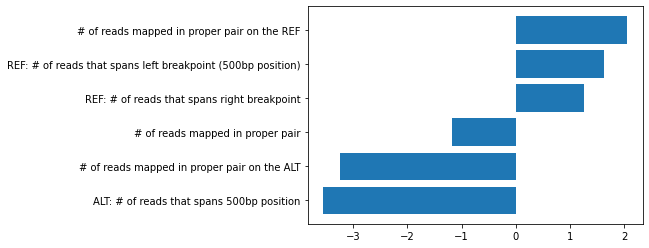

array([0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2,
       0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0,

In [34]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [35]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[194   1   0   0]
 [  2  74   9   0]
 [  0   4  83   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.94      0.87      0.90        85
           2       0.90      0.95      0.93        87
           3       0.00      0.00      0.00         1

    accuracy                           0.95       368
   macro avg       0.71      0.70      0.70       368
weighted avg       0.95      0.95      0.95       368

0.9538043478260869


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using rbf (with non-linear boundary) as kernel

In [40]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.9176267093868266


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [45]:
clf = svm.SVC(kernel="rbf", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
pred_lin = clf.predict(X_test)
pred_lin

array([0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2,
       0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0,

In [46]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[194   1   0   0]
 [  2  75   8   0]
 [  0   6  81   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.91      0.88      0.90        85
           2       0.91      0.93      0.92        87
           3       0.00      0.00      0.00         1

    accuracy                           0.95       368
   macro avg       0.70      0.70      0.70       368
weighted avg       0.95      0.95      0.95       368

0.9510869565217391


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DNN - Deep Neural Network

In [37]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

ValueError: Shape of passed values is (1837, 6), indices imply (1837, 3)

In [ ]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "0/1", "1/1", "./."])
df_GIAB_2_y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(10, activation='relu', name='layer_3')) # tahn
    model.add(Dense(4, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

In [ ]:
history = estimator.fit(X_train, y_train)

In [ ]:
history.history["accuracy"]

In [ ]:
history.history["loss"]

In [ ]:
estimator.predict(X_test)

In [ ]:
y_test

In [ ]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

In [ ]:
y_test = y_test2["genotype"].to_numpy()

In [ ]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [ ]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model().fit(X_train, y_train, epochs=200)

In [ ]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 